In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:

# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train-cat-rabbit'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test-images'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/train-cat-rabbit')))
print(len(os.listdir('/content/drive/MyDrive/train-cat-rabbit')))
print(len(os.listdir('/content/drive/MyDrive/test-images')))
print(len(os.listdir('/content/drive/MyDrive/test-images')))

2
2
2
2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout


In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification


In [10]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))


94765736/94765736 [==============================] - 1s 0us/step


In [11]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [12]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [15]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
40/40 [==============================] - 240s 6s/step - loss: 4.9948e-05 - accuracy: 1.0000 - val_loss: 0.6470 - val_accuracy: 0.9281
Epoch 2/30
40/40 [==============================] - 240s 6s/step - loss: 4.0380e-05 - accuracy: 1.0000 - val_loss: 0.6555 - val_accuracy: 0.9281
Epoch 3/30
40/40 [==============================] - 241s 6s/step - loss: 3.2764e-05 - accuracy: 1.0000 - val_loss: 0.6612 - val_accuracy: 0.9281
Epoch 4/30
40/40 [==============================] - 242s 6s/step - loss: 2.7407e-05 - accuracy: 1.0000 - val_loss: 0.6668 - val_accuracy: 0.9281
Epoch 5/30
40/40 [==============================] - 252s 6s/step - loss: 2.3976e-05 - accuracy: 1.0000 - val_loss: 0.6722 - val_accuracy: 0.9281
Epoch 6/30
40/40 [==============================] - 245s 6s/step - loss: 2.1273e-05 - accuracy: 1.0000 - val_loss: 0.6764 - val_accuracy: 0.9281
Epoch 7/30
40/40 [==============================] - 254s 6s/step - loss: 1.8923e-05 - accuracy: 1.0000 - val_loss: 0.6823 - val_ac

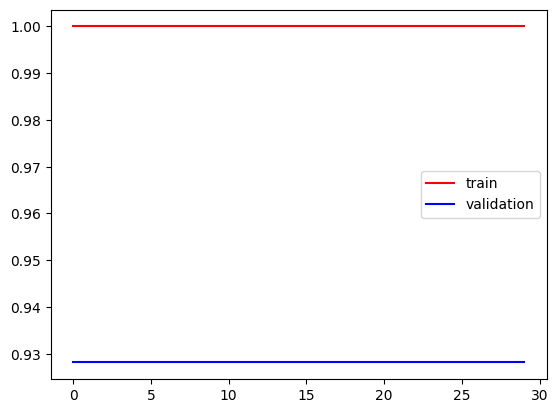

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

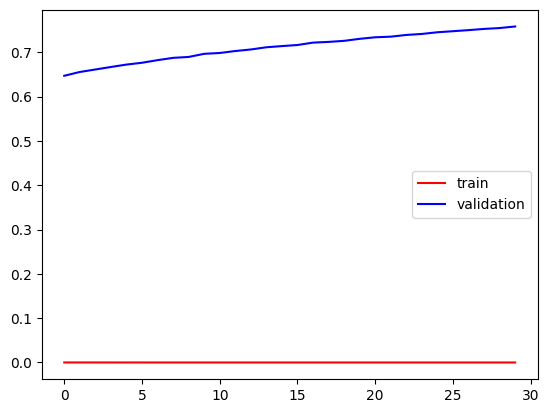

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 15 images belonging to 2 classes.


In [19]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[2.6496770e-04]
 [2.3470262e-12]
 [2.9020351e-08]
 [9.9999964e-01]
 [9.9999756e-01]
 [1.0000000e+00]
 [4.9767586e-06]
 [7.1644412e-14]
 [8.2451255e-09]
 [1.8696192e-14]
 [2.8219790e-07]
 [1.9058312e-01]
 [7.6196337e-01]
 [4.5799762e-12]
 [4.7735877e-09]]


In [20]:
len(predictions)

15

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[7 3]
 [4 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.25      0.20      0.22         5

    accuracy                           0.53        15
   macro avg       0.44      0.45      0.44        15
weighted avg       0.51      0.53      0.52        15

